<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_fearful_faces/blob/main/LSM_fearful2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSM for fearful-faces data



[[-1.938], [-2.149], [-2.456], [-0.817]]
[[0.94], [1.457], [1.209], [1.601]]
[[-1.168], [-1.375], [-0.963], [-3.114]]
[[-7.277], [-7.13], [-8.443], [-5.326]]
[[-3.956], [-3.571], [-4.913], [-4.0]]
[[-2.48], [-4.405], [-4.822], [-5.65]]
[[-2.445], [-5.311], [-1.942], [-2.259]]
[[-2.023], [-0.257], [-0.885], [-2.335]]
[[-5.47], [-5.372], [-5.055], [-5.626]]
[[2.808], [0.169], [0.294], [1.186]]
[[-2.97], [-3.653], [-4.171], [-3.572]]
[[2.09], [-1.116], [0.329], [-0.887]]
[[-5.045], [-3.478], [-4.491], [-4.65]]
[[-4.229], [-4.006], [-2.077], [-4.61]]
[[-7.122], [-6.656], [-6.391], [-6.223]]
[[2.051], [3.792], [4.904], [4.298]]
[[-5.694], [-5.544], [-4.906], [-4.668]]
[[-4.96], [-3.362], [-3.88], [-4.409]]
[[-1.162], [-2.389], [-1.445], [-2.353]]
[[4.599], [2.681], [2.29], [-0.558]]
[[-1.042], [-3.207], [0.889], [1.893]]
[[-3.021], [-2.985], [-3.403], [-2.156]]
[[-2.044], [-1.756], [-1.9], [-2.39]]


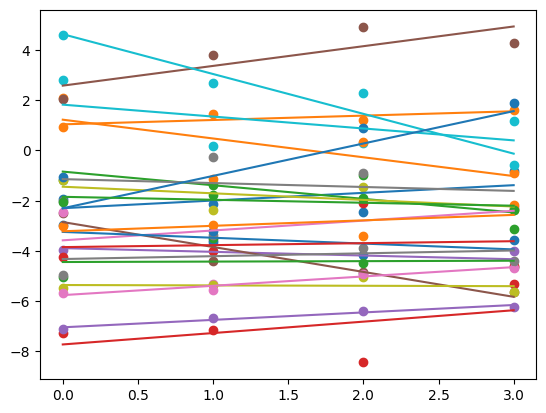

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

model = linear_model.LinearRegression()

df = pd.read_csv("lsm_fearful2023.csv", encoding="shift-jis")
# df = pd.read_csv("lsm_demo.csv")

# row: participant, column: number (0, 1, 2, 3)

# Results list
coef_results = []
intercept_results = []

x = [[0], [1], [2], [3]]

# columns_of_interest = ["smile0", "smile1", "smile2", "smile3"]
columns_of_interest = ["fearful0_P7", "fearful1_P7", "fearful2_P7", "fearful3_P7"]


# List of participants
unique_pars = df["participant No."].unique()
pars_num = len(unique_pars)

#y = df[df["participant"] == 1][["participant", "smile1"]].values.tolist()

fig, ax1 = plt.subplots(1, 1)
#fig, ax = plt.subplots(1, 1)

for participant, n in zip(unique_pars, range(pars_num)):
  y = df[df["participant No."] == participant]
  y_list_all = y.values.flatten().tolist()
  y_list = y_list_all[1:5]

  two_d_y = [[i] for i in y_list]
  print(two_d_y)
  model.fit(x, two_d_y)

  coef = model.coef_.flatten().tolist()
  intercept = model.intercept_.tolist()

  coef_results.append(coef[0])
  intercept_results.append(intercept[0])

  ax1.scatter([0, 1, 2, 3], y_list)
  ax1.plot(x, model.predict(x))


"""
fig, ax = plt.subplots(1, 4)

for participant, n in zip(unique_pars, range(pars_num)):
  y = df[df["participant"] == participant]
  y_list_all = y.values.flatten().tolist()
  y_list = y_list_all[1:5]

  two_d_y = [[i] for i in y_list]
  print(two_d_y)
  model.fit(x, two_d_y)

  coef = model.coef_.flatten().tolist()
  intercept = model.intercept_.tolist()

  coef_results.append(coef[0])
  intercept_results.append(intercept[0])

  ax[n].scatter([0, 1, 2, 3], y_list)
  ax[n].plot(x, model.predict(x))

print(coef_results)
print(intercept_results)
print(unique_pars)
"""

### Creating result dataframe
df_results = pd.DataFrame()
df_results["id"] = unique_pars
df_results["coef"] = coef_results
df_results["intercept"] = intercept_results
df_results["EC"] = df["EC"]

df_results

df_results.to_csv("lsm_fearful2023_results.csv")

# Scatter plot (EC * coef)


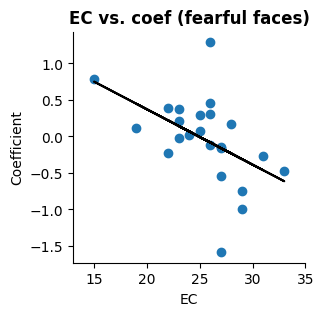

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

fig, ax1 = plt.subplots(1,1, figsize = (3, 3))

slope, intercept, r_value, p_value, std_err = linregress(df_results["EC"], df_results["coef"])

ax1.scatter(df_results["EC"], df_results["coef"])
ax1.set_xlabel("EC")
ax1.set_ylabel("Coefficient")
ax1.set_title("EC vs. coef (fearful faces)", weight = "bold")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax1.set_xticks(np.arange(15, 40, 5))
ax1.set_xlim(13, 35)

trendline = slope * df_results["EC"] + intercept
ax1.plot(df_results["EC"], trendline, color='black', label="Trendline")

plt.savefig("EC_coef_scatter_fearful2023.png", dpi = 500, bbox_inches='tight')